# Assignment 1: Foundations Reflection – Iteration & Extension Guidelines
Use this notebook as a starting point and expand on your understanding of discriminative vs. generative models by completing the following structured tasks. You are encouraged to experiment, analyze, and critically reflect on your findings in your report.

## Part 1 – Discriminative Model (Logistic Regression) Extensions

1. Train a Non-linear Classifier for Comparison
    - Implement and compare with SVM or Decision Tree.
    - Analyze classification performance vs. logistic regression.

In [1]:
import sys
print(f"Using Python {sys.version.split()[0]}")

# Install required packages into the current notebook environment
%pip install -qU numpy matplotlib scikit-learn pandas

# Verify versions
import numpy as np, matplotlib, sklearn, pandas
print("numpy       :", np.__version__)
print("matplotlib  :", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("pandas      :", pandas.__version__)
print("✅ Setup complete!")

Using Python 3.14.2
Note: you may need to restart the kernel to use updated packages.
numpy       : 2.4.1
matplotlib  : 3.10.8
scikit-learn: 1.8.0
pandas      : 3.0.0
✅ Setup complete!


Data shape: (70000, 784)
labels: [0 1 2 3 4 5 6 7 8 9]


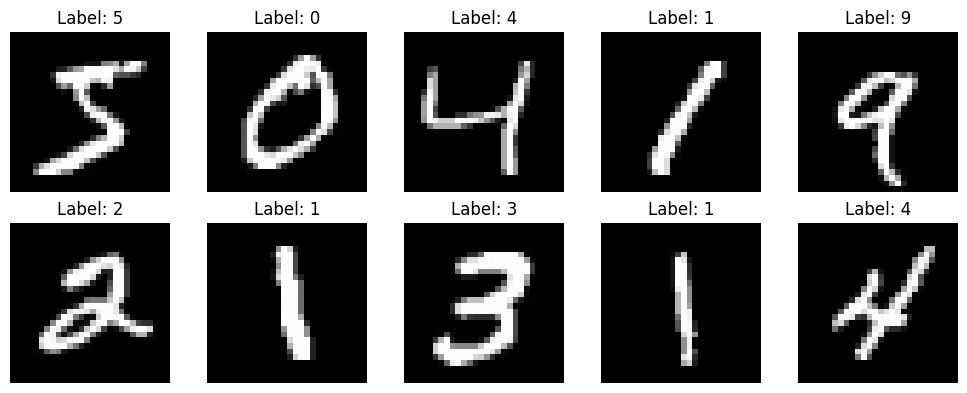

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Load complete MNIST dataset (28x28, 70,000 samples)
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data.to_numpy()  # Convert to numpy array
y = mnist.target.astype(int).to_numpy()

print(f"Data shape: {X.shape}")  # (70000, 784)
print(f"labels: {np.unique(y)}")

# Visualize first 10 samples
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Stratified subsample to speed up (2,000 samples)
X_small, _, y_small, _ = train_test_split(
    X, y,
    train_size=2000,
    stratify=y,
    random_state=42
)
print(f"Subsampled set: {X_small.shape}")

# Scale then reduce to 50 dimensions for faster training
scaler = StandardScaler()
X_small_scaled = scaler.fit_transform(X_small)

pca = PCA(n_components=50, random_state=42)
X_small_pca = pca.fit_transform(X_small_scaled)
print(f"PCA-transformed shape: {X_small_pca.shape}")

# Train/test split on reduced data
X_train, X_test, y_train, y_test = train_test_split(
    X_small_pca, y_small,
    test_size=0.2,
    stratify=y_small,
    random_state=42
)

Subsampled set: (2000, 784)
PCA-transformed shape: (2000, 50)


In [4]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")

Test accuracy: 0.8750


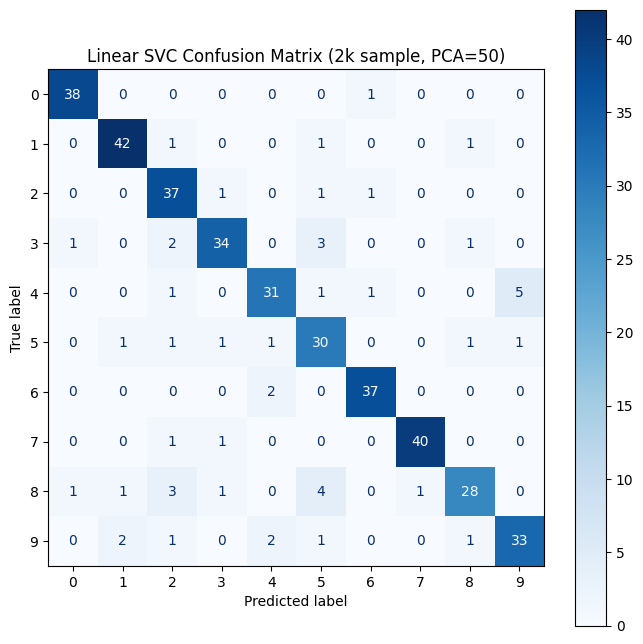

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap="Blues", colorbar=True)
ax.set_title("Linear SVC Confusion Matrix (2k sample, PCA=50)")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(max_depth=25, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree test accuracy: {acc_dt:.4f}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(cm_dt)
fig, ax = plt.subplots(figsize=(8, 8))
disp_dt.plot(ax=ax, cmap="Greens", colorbar=True)
ax.set_title("Decision Tree Confusion Matrix (2k sample, PCA=50)")
plt.show()